## Compute no. of restaurants within 1km from each of the listed restaurants

The input file usa.csv is the output from YelpRestaurant.ipynb script.  This file contains the list of United States restaurants listed in Yelp dataset and their coordinates.

In [102]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos, asin, sqrt

%matplotlib inline

In [103]:
#usa.csv file contains a listing of restaurants extracted from Yelp for analysis

path = r"C:\Course Material\2018\Machine Learning\Project"
file_biz = "usa.csv"

In [104]:
df_base = pd.read_csv(os.path.join(path,file_biz))
df_base.head(3)

,state,business_id,name,postal_code,latitude,longitude
0,NC,mLwM-h2YhXl2NCgdS84_Bw,South Florida Style Chicken & Ribs,28215.0,35.236870,-80.741976
1,AZ,duHFBe87uNSXImQmvBh87Q,Blimpie,85016.0,33.505928,-112.038847
2,NC,SDMRxmcKPNt1AHPBKqO64Q,Applebee's,28105.0,35.135196,-80.714683


In [105]:
len(df_base)

30959

In [106]:
df_base["state"].value_counts()

AZ    10219
NV     6882
OH     4513
NC     3625
PA     3435
WI     1486
IL      598
SC      201
Name: state, dtype: int64

In [107]:
# For managing performance, we will first sort the dataframe according to states

df_base=df_base.sort_values("state")

df_base.reset_index(inplace=True,drop=True)
df = df_base.copy()
print(df.head(10))
print(df.tail(10))

  state             business_id                           name  postal_code  \
0    AZ  -YR7K3rw6VAQ1-MjslvsoQ         Eastwind Sushi & Grill      85032.0   
1    AZ  -ouvCdkuZJgHixwyAhB8Nw            Pete's Fish & Chips      85040.0   
2    AZ  MUL6OwocXH5LLU3qcJyTvA                     Wok N Roll      85143.0   
3    AZ  kWkW6vVePpBox_fKfGgPjQ  Pan Asia Sushi Chinese Fusion      85042.0   
4    AZ  DF6kMTHYuKKME_00AinR-w        Even Stevens Sandwiches      85281.0   
5    AZ  nJNukcrwL5CmCXviiJvcBw       Jimbo's Good Times Grill      85205.0   
6    AZ  I_a74zmgR-X03LsKISWPcg               Snoh Ice Shavery      85014.0   
7    AZ  PgW75NwQUJ1wNOapwZ1bnw      La Victoria Mexican Grill      85225.0   
8    AZ  JMQDqoJHyCCguklrhPQEPw           Xaviers Casa Reynoso      85206.0   
9    AZ  pYZnKIv0z-UxrpgBjp_z1w           Kokobelli Bagel Cafe      85206.0   

    latitude   longitude  
0  33.610821 -111.977497  
1  33.410808 -112.073620  
2  33.137277 -111.539195  
3  33.377114 -112.0278

In [108]:
#Get the no. of nearby restaurants within 1km for each restaurant

# The function distance calculates the distance between 2 sets of coordinates and return 1 if the distance is within 1km.
def distance(lat1, lon1,lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    distance = 12742 * asin(sqrt(a))
   
    if distance > 1 or distance == 0:
        return 0
    else:
        return 1    

# The function closest will pass the base coordinates and the list of coordinates to be iterated through to function distance and sum up the results returned.
def closest(df_curr):
    lat_list =list(df[df["state"]==df_curr["state"]]["latitude"])
    lon_list =list(df[df["state"]==df_curr["state"]]["longitude"])

    f = sum(distance(lat_list[i], lon_list[i], df_curr['latitude'],df_curr['longitude']) for i in range(len(lat_list)))   
    return f

# This workaround is based on the assumption that any restaurants within 1km away is within the same state and is implemented for performance purposes. 
# This workaround will ensure that only restaurants within the same state is iterated for distance check.
unique_states =df["state"].unique()
df["num_nearby_rest"]=0

start_index=0
end_index=0

for i in unique_states:
    t=0
    print("start time:", time.time())
    print(i)
    l = len(df[df["state"]==i])
    print("no of recs:", l)
    start_index = end_index
    end_index= end_index + l
    print(start_index, end_index)
    
    df.iloc[start_index:end_index]["num_nearby_rest"] = df.iloc[start_index:end_index].apply(closest,axis=1)
    print("end time:",time.time())

start time: 1521399783.6302955
AZ
no of recs: 10219
0 10219


C:\Users\stephielsw\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


end time: 1521402699.792826
start time: 1521402699.792826
IL
no of recs: 598
10219 10817
end time: 1521402714.4671896
start time: 1521402714.4671896
NC
no of recs: 3625
10817 14442
end time: 1521403102.231036
start time: 1521403102.231036
NV
no of recs: 6882
14442 21324
end time: 1521404440.6315107
start time: 1521404440.632514
OH
no of recs: 4513
21324 25837
end time: 1521405027.7950068
start time: 1521405027.796008
PA
no of recs: 3435
25837 29272
end time: 1521405374.4559743
start time: 1521405374.4559743
SC
no of recs: 201
29272 29473
end time: 1521405377.3849294
start time: 1521405377.3849294
WI
no of recs: 1486
29473 30959
end time: 1521405448.975719


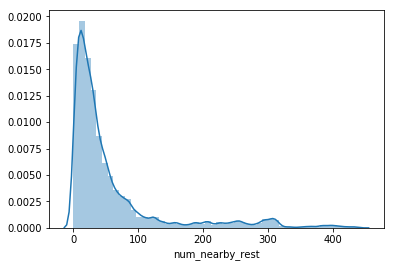

In [110]:
sns.distplot(df["num_nearby_rest"])

In [116]:
# Output results to nearbyrestaurant.csv

import csv
with open('nearbyrestaurant.csv', 'w', encoding="utf-8", newline= "") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["state","business_id","latitude","name", "postal_code", "longitude", "num_nearby_rest"])
    for i in range(len(df)):
        writer.writerow(df.iloc[i])